Alleyah Pauline C. Manalili </br>
New Link to Dataset: https://www.openintro.org/data/index.php?data=cia_factbook

# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Perform Exploratory Data Analysis

-----

In [15]:
df = pd.read_csv("cia_factbook.csv", delimiter = ",")
df

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB


In [17]:
df.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

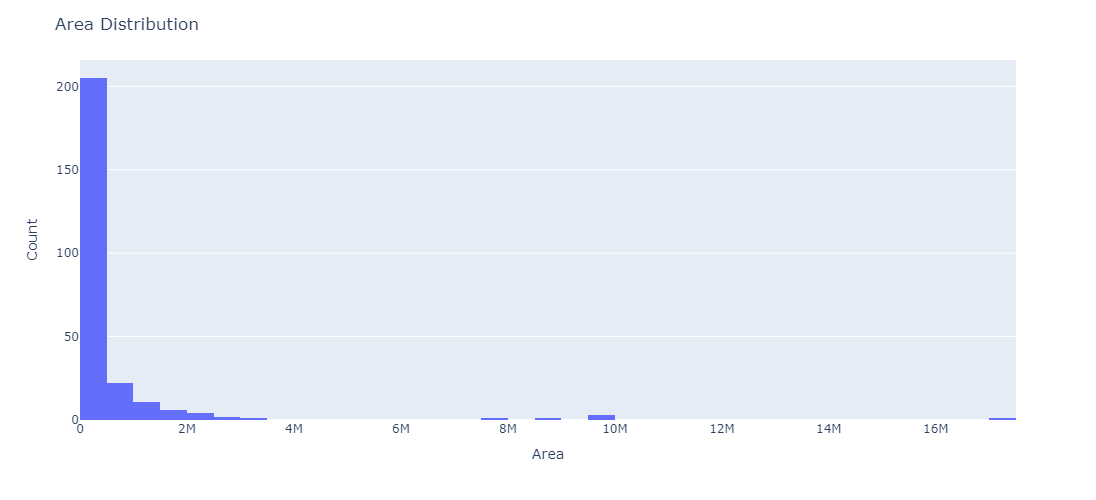

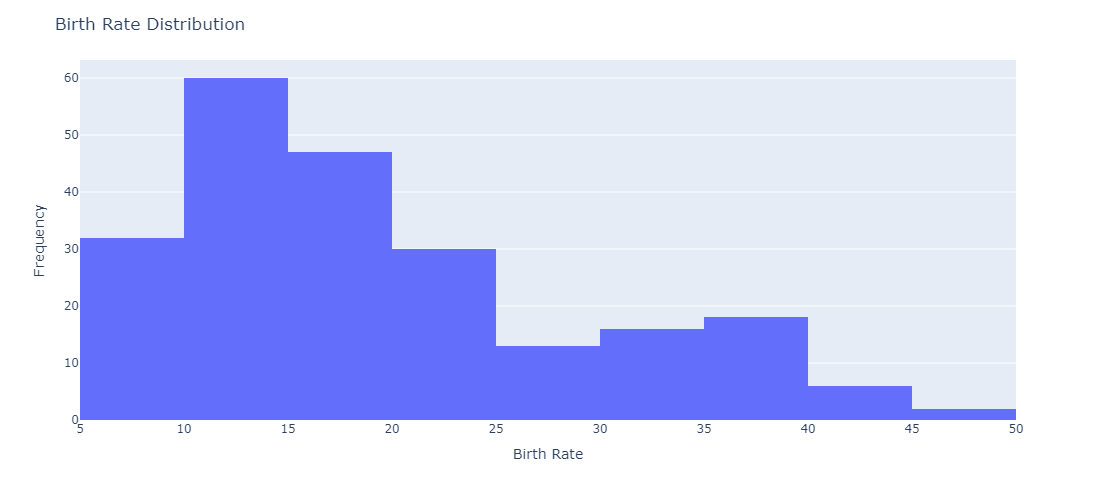

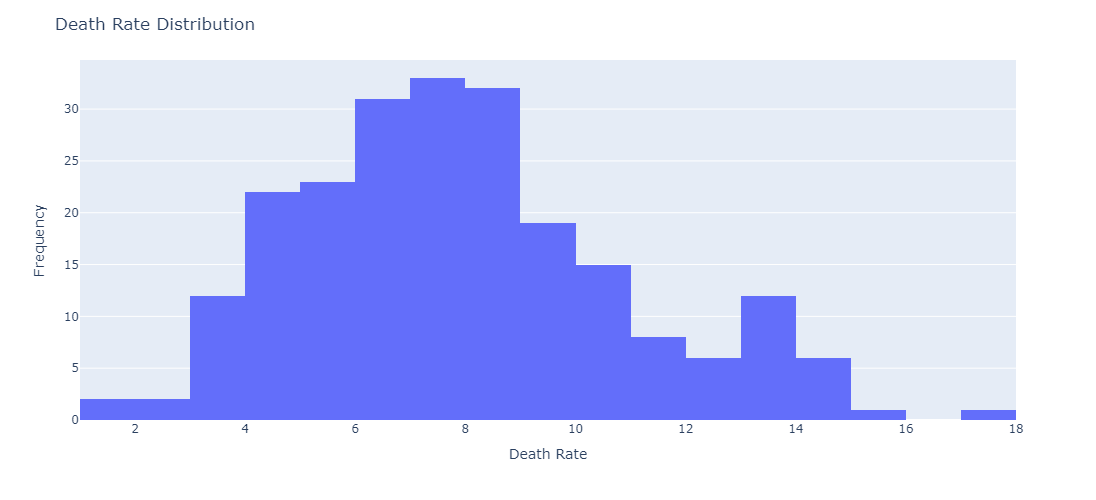

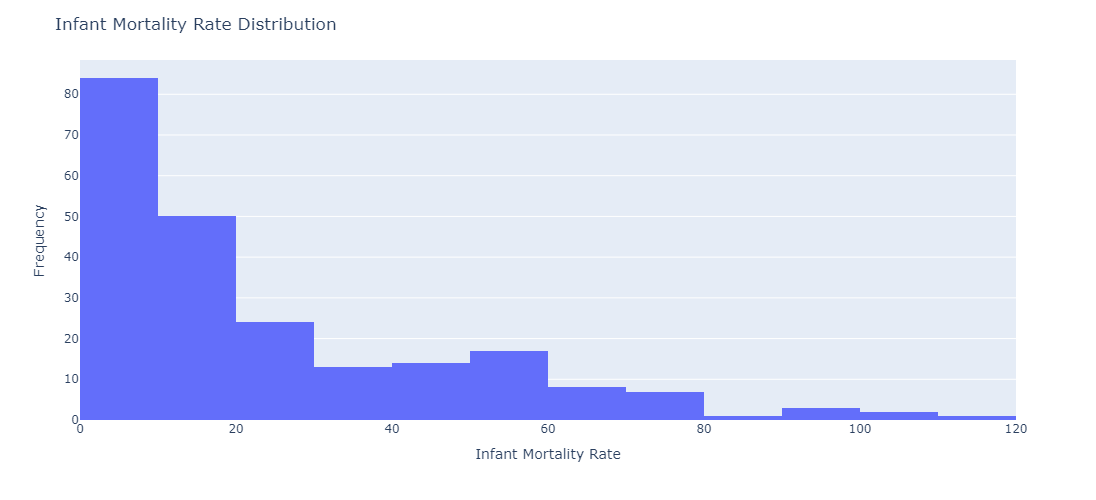

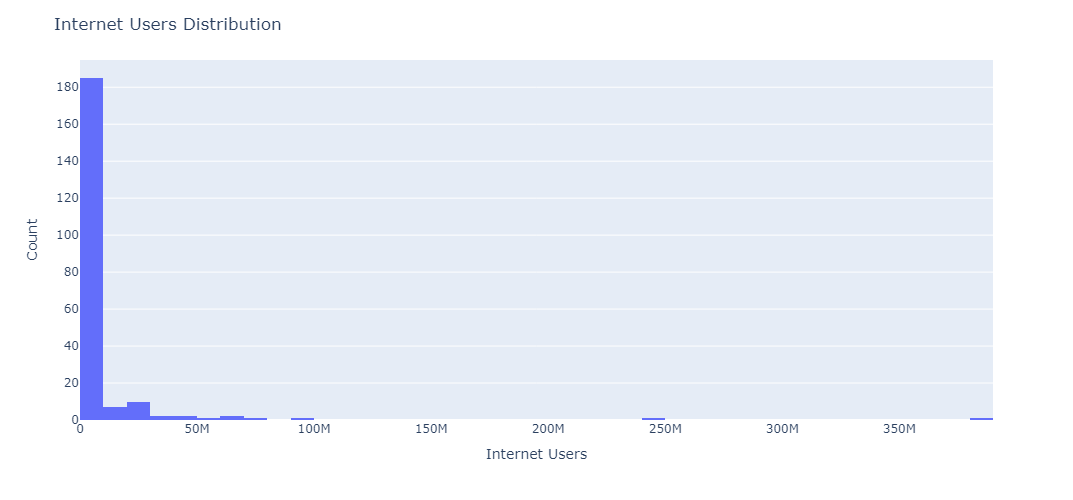

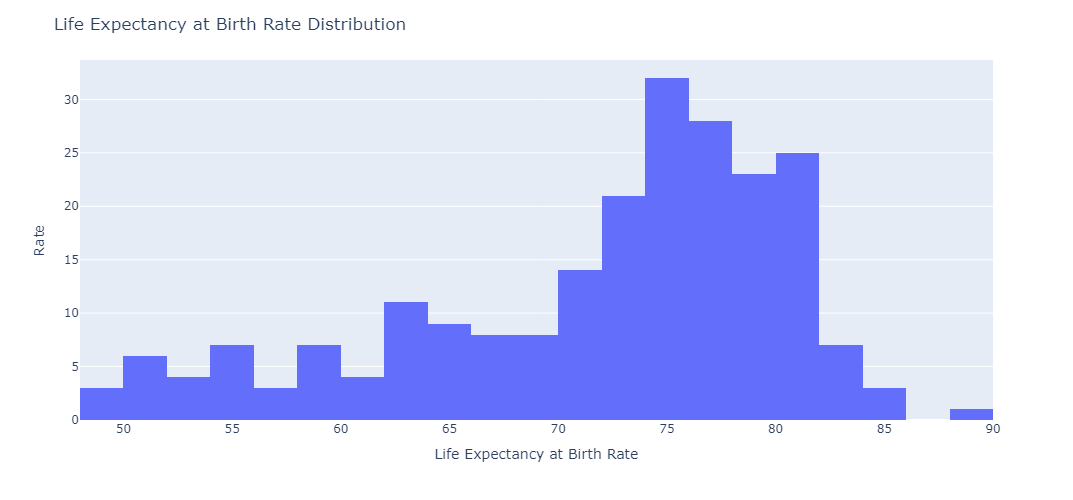

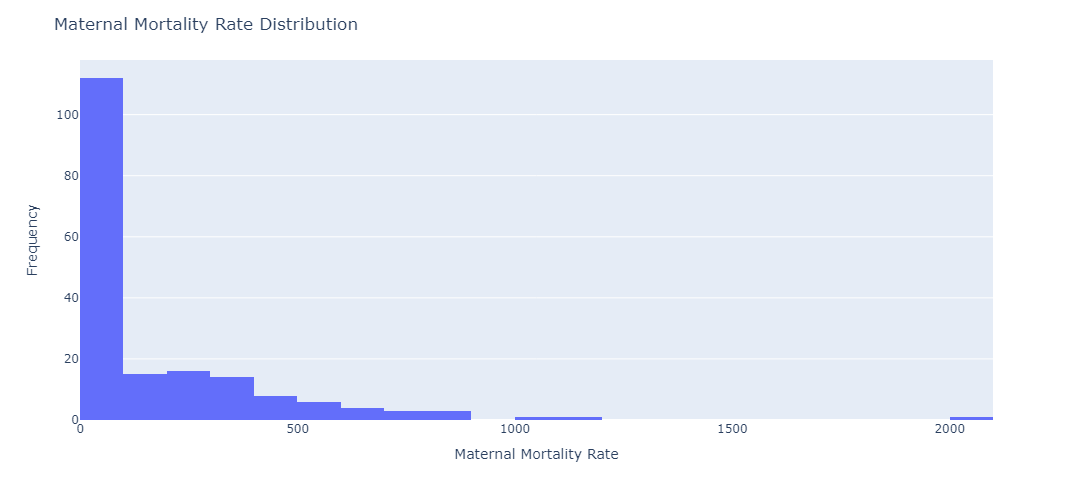

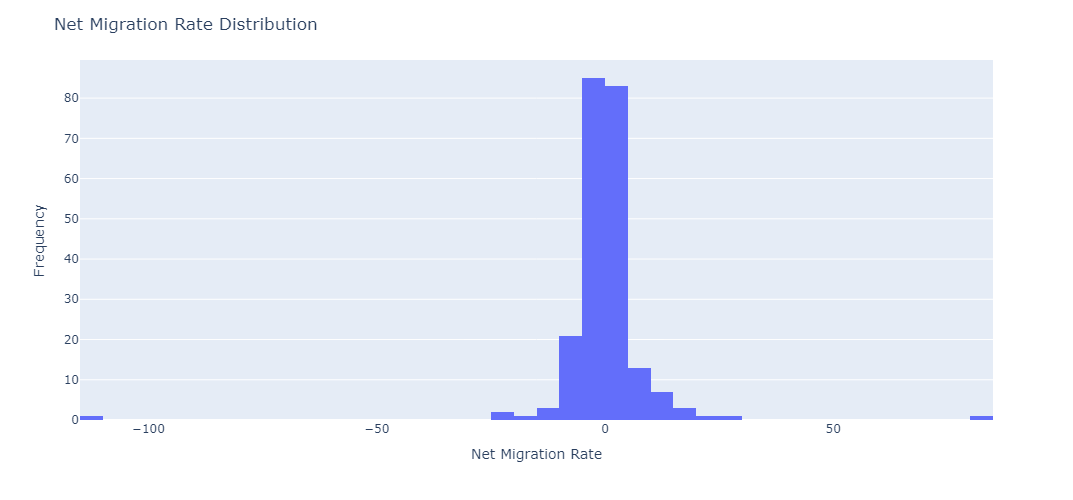

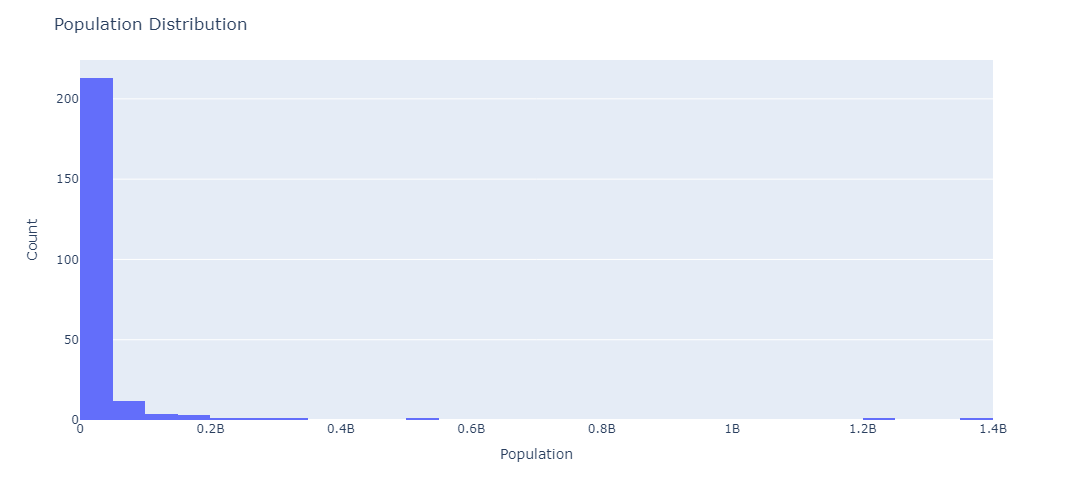

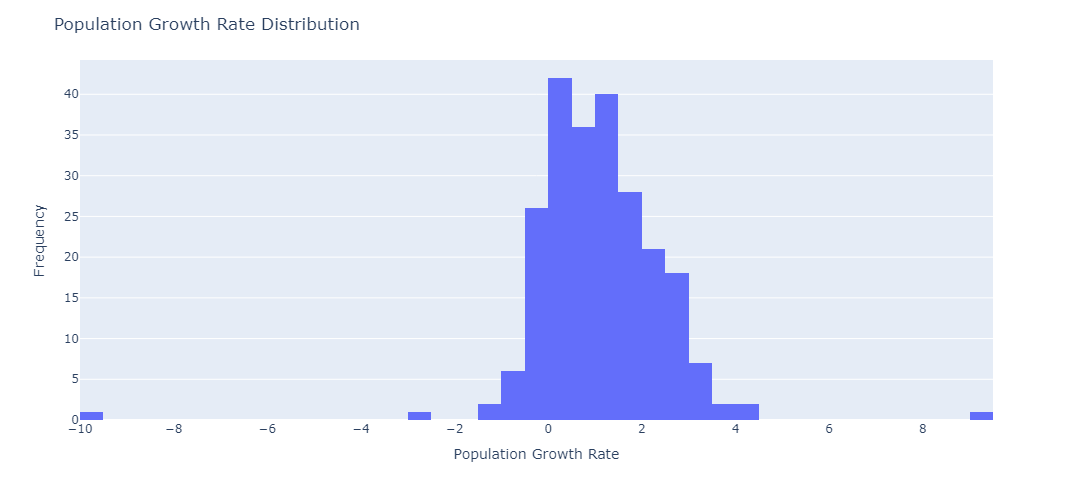

In [18]:
import plotly.express as px

fig = px.histogram(df,x='area')
fig.update_layout(title = "Area Distribution", height = 500)
fig.update_layout(xaxis_title = "Area",yaxis_title = "Count")
fig.show()

fig = px.histogram(df,x='birth_rate')
fig.update_layout(title = "Birth Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Birth Rate",yaxis_title = "Frequency")
fig.show()

fig = px.histogram(df,x='death_rate')
fig.update_layout(title = "Death Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Death Rate",yaxis_title = "Frequency")
fig.show()

fig = px.histogram(df,x='infant_mortality_rate')
fig.update_layout(title = "Infant Mortality Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Infant Mortality Rate",yaxis_title = "Frequency")
fig.show()

fig = px.histogram(df,x='internet_users')
fig.update_layout(title = "Internet Users Distribution", height = 500)
fig.update_layout(xaxis_title = "Internet Users",yaxis_title = "Count")
fig.show()

fig = px.histogram(df,x='life_exp_at_birth')
fig.update_layout(title = "Life Expectancy at Birth Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Life Expectancy at Birth Rate",yaxis_title = "Rate")
fig.show()

fig = px.histogram(df,x='maternal_mortality_rate')
fig.update_layout(title = "Maternal Mortality Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Maternal Mortality Rate",yaxis_title = "Frequency")
fig.show()

fig = px.histogram(df,x='net_migration_rate')
fig.update_layout(title = "Net Migration Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Net Migration Rate",yaxis_title = "Frequency")
fig.show()

fig = px.histogram(df,x='population')
fig.update_layout(title = "Population Distribution", height = 500)
fig.update_layout(xaxis_title = "Population",yaxis_title = "Count")
fig.show()

fig = px.histogram(df,x='population_growth_rate')
fig.update_layout(title = "Population Growth Rate Distribution", height = 500)
fig.update_layout(xaxis_title = "Population Growth Rate",yaxis_title = "Frequency")
fig.show()

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [19]:
df.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

There is no Agriculture in the list of variables. However, there are multiple variables with NaN values in certain countries.

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


**TASK:Use the same method for the missing values in Literacy.**

In this context, since there are no Climate and Literacy in the dataset, I will fill in all the missing values in the dataset. 

In [24]:
columns_to_fill = ['area', 'birth_rate', 'death_rate', 'infant_mortality_rate', 'internet_users', 'life_exp_at_birth', 'maternal_mortality_rate', 'net_migration_rate', 'population', 'population_growth_rate']

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

print(df)

              country          area  birth_rate  death_rate  \
0              Russia  1.709824e+07   11.870000   13.830000   
1              Canada  9.984670e+06   10.290000    8.310000   
2       United States  9.826675e+06   13.420000    8.150000   
3               China  9.596960e+06   12.170000    7.440000   
4              Brazil  8.514877e+06   14.720000    6.540000   
..                ...           ...         ...         ...   
254     Bouvet Island  4.900000e+01   19.659063    7.906978   
255     Palmyra Atoll  1.200000e+01   19.659063    7.906978   
256          Akrotiri  1.230000e+02   19.659063    7.906978   
257    European Union  5.308881e+05   19.659063    7.906978   
258  Saint Barthelemy  5.308881e+05   19.659063    7.906978   

     infant_mortality_rate  internet_users  life_exp_at_birth  \
0                  7.08000    4.085300e+07          70.160000   
1                  4.71000    2.696000e+07          81.670000   
2                  6.17000    2.450000e+08      

# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [25]:
df.head()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80


In [27]:
X = pd.get_dummies(df)
X

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,country_Venezuela,country_Vietnam,country_Virgin Islands,country_Wake Island,country_Wallis and Futuna,country_West Bank,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,1.709824e+07,11.870000,13.830000,7.08000,4.085300e+07,70.160000,34.000000,1.690000,1.424703e+08,-0.030000,...,False,False,False,False,False,False,False,False,False,False
1,9.984670e+06,10.290000,8.310000,4.71000,2.696000e+07,81.670000,12.000000,5.660000,3.483484e+07,0.760000,...,False,False,False,False,False,False,False,False,False,False
2,9.826675e+06,13.420000,8.150000,6.17000,2.450000e+08,79.560000,21.000000,2.450000,3.188921e+08,0.770000,...,False,False,False,False,False,False,False,False,False,False
3,9.596960e+06,12.170000,7.440000,14.79000,3.890000e+08,75.150000,37.000000,-0.320000,1.355693e+09,0.440000,...,False,False,False,False,False,False,False,False,False,False
4,8.514877e+06,14.720000,6.540000,19.21000,7.598200e+07,73.280000,56.000000,-0.150000,2.026568e+08,0.800000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,4.900000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,...,False,False,False,False,False,False,False,False,False,False
255,1.200000e+01,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,...,False,False,False,False,False,False,False,False,False,False
256,1.230000e+02,19.659063,7.906978,24.48442,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858,...,False,False,False,False,False,False,False,False,False,False
257,5.308881e+05,19.659063,7.906978,4.33000,8.311771e+06,80.020000,177.972826,-0.181577,5.114348e+08,1.100858,...,False,False,False,False,False,False,False,False,False,False


**TASK: For numerical data perform standard scaler.**

In [46]:
from sklearn.preprocessing import StandardScaler

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

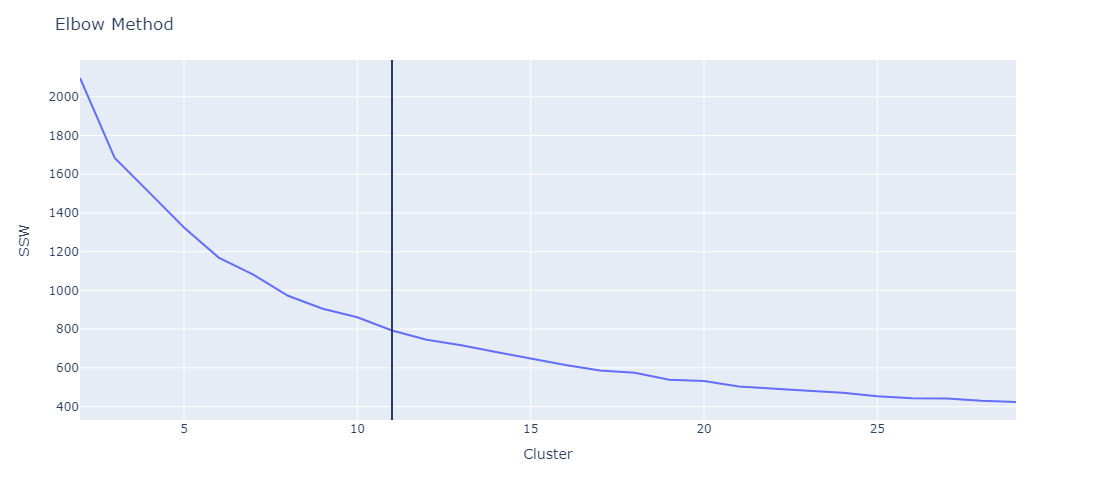

array([ 2,  2,  2,  5,  2,  2, 10,  0,  0,  0,  1,  0,  6,  0,  0,  7,  6,
        0,  0,  0,  1,  1,  1,  1,  9,  0,  7,  0,  7,  0,  7,  1,  0,  9,
        1,  7,  0,  0,  1,  0,  1,  1,  3,  1,  1,  3,  7,  9,  7,  7,  3,
        3,  0,  1,  7,  3,  0,  0,  0,  0,  7,  3,  3,  1,  3,  0,  0,  3,
        7,  3,  6,  3,  0,  0,  1,  3,  9,  7,  7,  3,  7,  7,  3,  7,  0,
        3,  0,  7,  4,  7,  3,  0,  0,  0,  0,  0,  3,  0,  0,  7,  7,  7,
        0,  1,  3,  3,  0,  3,  3,  3,  3,  6,  0,  3,  6,  3,  3,  6,  1,
        6,  3,  0,  3,  3,  0,  7,  3,  3,  6,  3,  0,  3,  3,  3,  3,  0,
        1,  3,  3,  3,  9,  3,  6,  3,  7,  1,  7,  7,  3,  7,  0,  0,  6,
        3,  6,  0,  6,  9,  7,  0,  3,  3,  0,  0,  6,  7,  0,  0,  8,  6,
        6,  6,  0,  0,  0,  0,  3,  7,  0,  3,  3,  3,  7,  6,  0,  6,  3,
        0,  0,  6,  3,  3,  0,  3,  6,  3,  0,  0,  0,  3,  3,  6,  0,  3,
        3,  0,  6,  0,  0,  3,  3,  0,  0,  3,  3,  6,  0,  0,  3,  0,  6,
        3,  3,  0,  3,  0

In [49]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

ssd = []
for k in range(2, 30):
    model = KMeans(n_clusters=k, n_init=10) 
    model.fit(X)
    ssd.append([k, model.inertia_])

ssd_df = pd.DataFrame(ssd, columns=["Cluster", "SSW"])
kl = KneeLocator(x=ssd_df.Cluster, y=ssd_df.SSW, curve="convex", direction="decreasing", S=1, online=True)
elbow_point = kl.elbow

fig = px.line(ssd_df, x="Cluster", y="SSW")
fig.add_vline(x=elbow_point)
fig.update_layout(title="Elbow Method", height=500)
fig.update_layout(xaxis_title="Cluster", yaxis_title="SSW")
fig.show()

optimal_model = KMeans(n_clusters=elbow_point, n_init=10)
cluster_labels = optimal_model.fit_predict(X)
cluster_labels

-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

Based on the findings of the Elbow Method figure for K-means clustering, the line that converges with the graph has a value of Cluster = 11 and SSW = 793.0551. In this context, the elbow point is K = 11, being the good choice for K values. The reason for this is that K = 11 shows a significant decrease in SSW compared to previous K values and a less pronounced rate of decrease beyond it, indicating improvement in clustering quality. It captures a meaningful cluster structure and avoids unnecessary complexity. It is possible that there are multiple reasonable choices. Features that may influence these choices include data distribution, correlation structure, feature importance, and interpretability.

---